In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Descripitive Statistics
> Measures of Spread
- `Variance`: which produce number which will be used to measure standured deviation
- `Standured deviation`: the square root of variance. This number represents the spread of the data and its variation
- `Q1`: represents 25% of the data
- `Q2` , `median`: represents 50% of the data
- `Q3`: represens 75% of the data 
- `IQR`: Q3 - Q1 


> For normal distribution about 68% of your data exist in (1,-1) segma

![Normal Distribution](<Screenshot 2023-12-16 220111.png>)

In [2]:
df = pd.read_csv('melb_data.csv')

In [8]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
df['Price'].quantile([0,0.25,0.5,0.75,1])

0.00      85000.0
0.25     650000.0
0.50     903000.0
0.75    1330000.0
1.00    9000000.0
Name: Price, dtype: float64

- We can use `box plot` to visualize the data and see the outliers and if the data is skewed or not 

<Axes: >

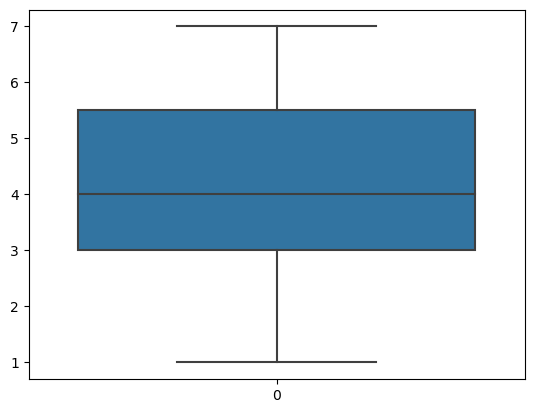

In [5]:
sns.boxplot(data = [2,4,4,5,6,1,7])

- You can see that their are no outliers in this data
- Let's try on our data  

<Axes: xlabel='Price'>

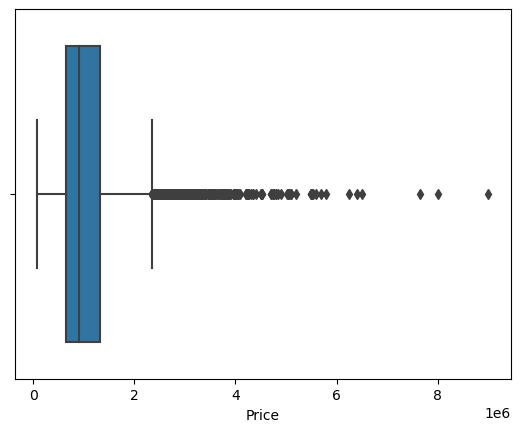

In [6]:
sns.boxplot(data = df , x= 'Price')

- You can see that the data is skewed right

<Axes: xlabel='Price', ylabel='Type'>

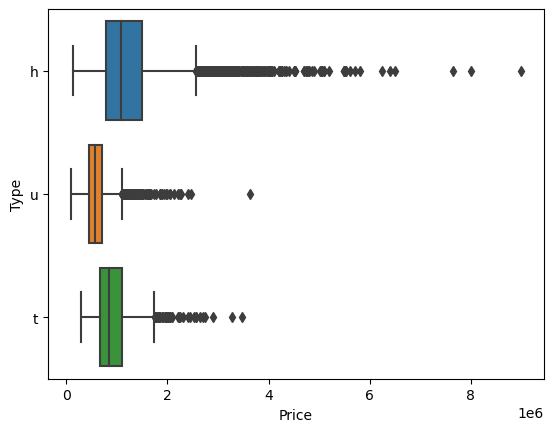

In [9]:
sns.boxplot(data = df , x= 'Price' , y = 'Type')

<Axes: xlabel='Price', ylabel='Count'>

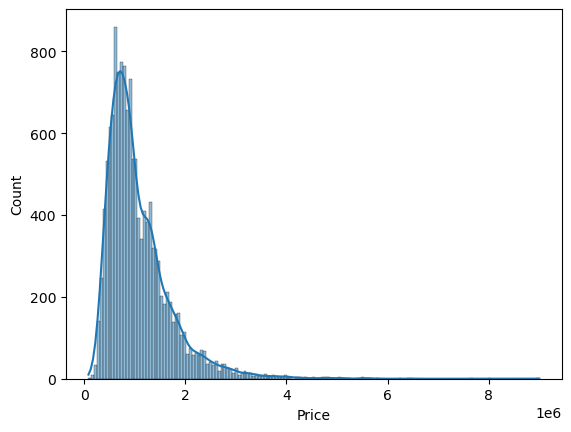

In [10]:
sns.histplot(data = df , x = 'Price',kde='True')

<Axes: xlabel='Price', ylabel='Probability'>

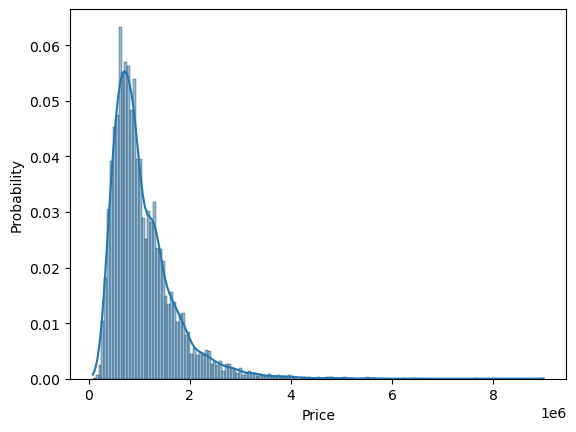

In [11]:
sns.histplot(data = df , x = 'Price',kde='True', stat= 'probability')

<Axes: xlabel='Price', ylabel='Density'>

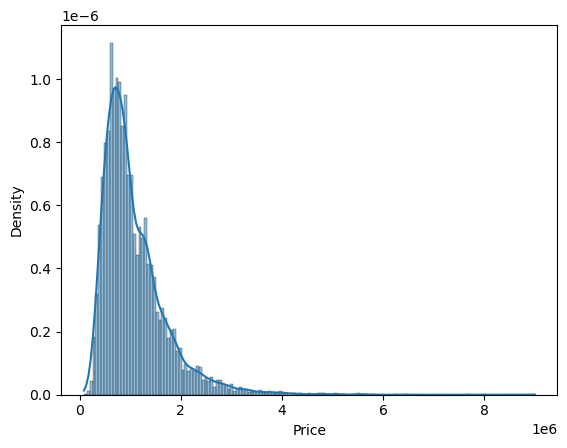

In [12]:
#Erea under the curve
sns.histplot(data = df , x = 'Price',kde='True', stat= 'density')

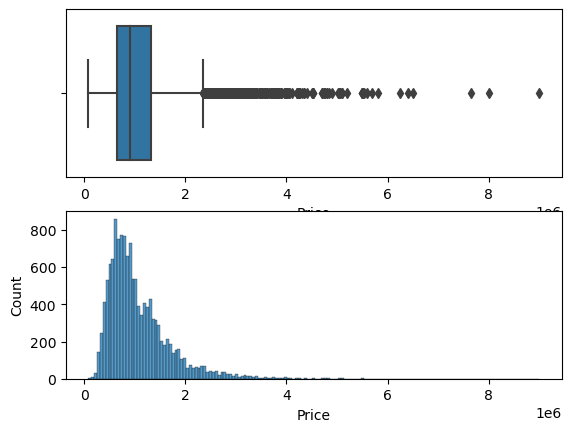

In [13]:
f , (ax_box,ax_hist)= plt.subplots(2)
sns.boxplot(data = df , x ='Price',ax = ax_box)
sns.histplot(data = df , x= 'Price' , ax = ax_hist)
plt.show()

> As machine learning models need the data be as normal as possible, you need to fix the data.
> If we want to handle the right skewed data we can apply `log` to the data.


In [15]:
df['log_price'] = df['Price'].apply(np.log)

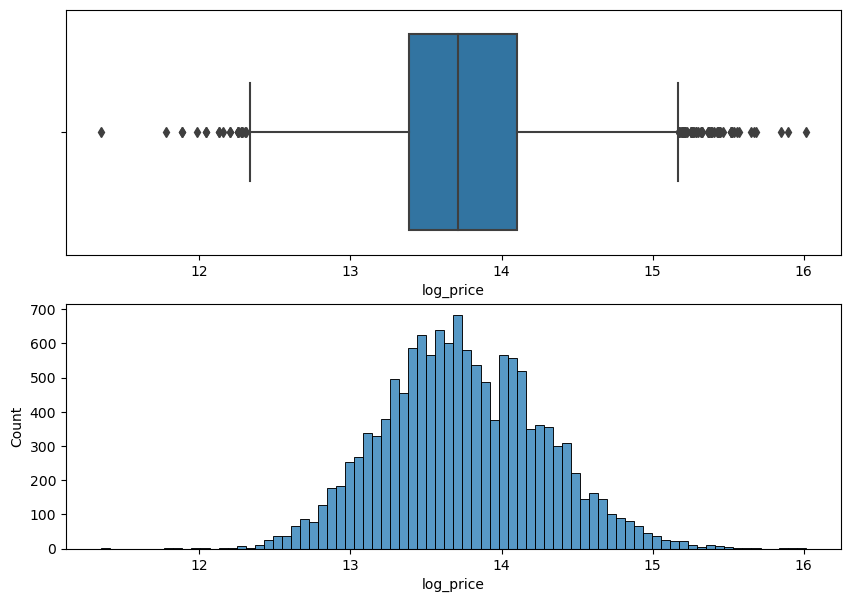

In [17]:
f , (ax_box,ax_hist)= plt.subplots(2,figsize = (10,7))
sns.boxplot(data = df , x ='log_price',ax = ax_box)
sns.histplot(data = df , x= 'log_price' , ax = ax_hist)
plt.show()

- NOTE:
    - Every calculation will be applied to the data and ML model trained on it, it should be taken into acount when you test your model.

### Types of Distributions

#### Bernoulli distribution

![Alt text](image-1.png)

In [2]:
data = np.random.binomial(n = 1 , p = 0.8 , size= 1000)

In [3]:
data

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

<Axes: ylabel='count'>

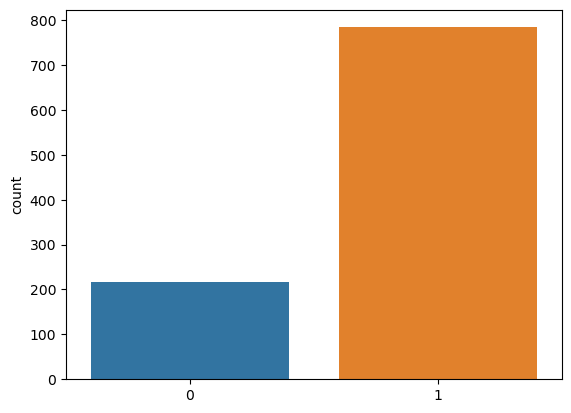

In [4]:
sns.countplot(x = data)

In [5]:
len(data[data == 1])

784

In [6]:
len(data[data == 0])

216

> bernoulli is a special case from bionomial

In [7]:
data = np.random.binomial(n = 1 , p = 0.8 , size= 10000)

In [19]:
print('mean = ', np.mean(data))
print('variance= ', np.var(data))

mean =  0.8028
variance=  0.15831216000000004


<Axes: ylabel='count'>

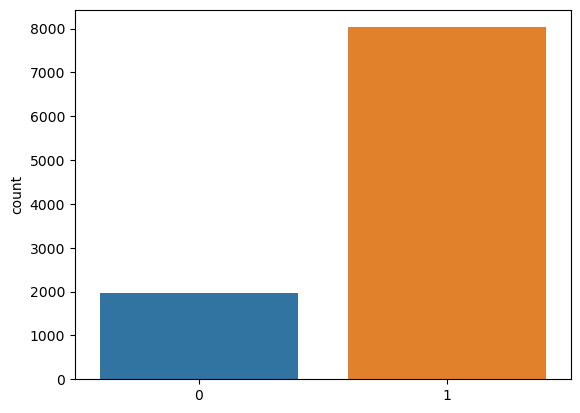

In [12]:
sns.countplot(x = data)

In [8]:
len(data[data == 1])

8028

In [9]:
len(data[data == 0])

1972

- Theoritically by sciby

In [14]:
from scipy.stats import bernoulli

In [22]:

x = [0,1]
p = bernoulli.pmf(x,0.8)
bernoulli.pmf(x,0.8)

array([0.2, 0.8])

<Axes: >

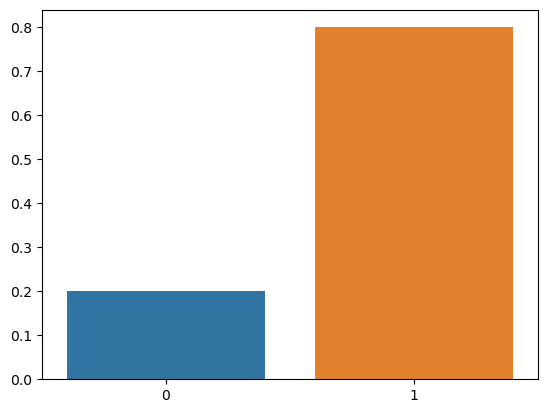

In [18]:
sns.barplot(x = x , y= p)

- mean and variance for 0.8 probability

In [20]:
bernoulli.stats(0.8,moments='mv')

(0.8, 0.15999999999999998)

### Bionomial distribution

![Alt text](image-2.png)